In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [3]:
df = pd.read_csv("heart.csv")
df.head()
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [9]:
df["target"].sum()

165

In [10]:
len(df["age"])

303

In [11]:
df["target"].unique()

array([1, 0])

In [13]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [15]:
df.groupby(df["target"])["target"].count()

target
0    138
1    165
Name: target, dtype: int64

Step 1: Remove Null values

In [17]:
df_prep = df.dropna()

In [19]:
len(df_prep)

303

In [21]:
df_prep.groupby(df["target"]).describe()

age                                                       sex  \
        count       mean       std   min   25%   50%   75%   max  count   
target                                                                    
0       138.0  56.601449  7.962082  35.0  52.0  58.0  62.0  77.0  138.0   
1       165.0  52.496970  9.550651  29.0  44.0  52.0  59.0  76.0  165.0   

                  ... thal      target                                     
            mean  ...  75%  max  count mean  std  min  25%  50%  75%  max  
target            ...                                                      
0       0.826087  ...  3.0  3.0  138.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1       0.563636  ...  2.0  3.0  165.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  

[2 rows x 112 columns]

In [24]:
temp = df_prep.loc[:,["age","trestbps","chol","thalach","target"]]

In [25]:
temp.head()

,age,trestbps,chol,thalach,target
0,63,145,233,150,1
1,37,130,250,187,1
2,41,130,204,172,1
3,56,120,236,178,1
4,57,120,354,163,1


In [27]:
temp_long = temp
temp_long = pd.melt(temp_long,id_vars="target")

In [28]:
temp_long.head()

,target,variable,value
0,1,age,63
1,1,age,37
2,1,age,41
3,1,age,56
4,1,age,57


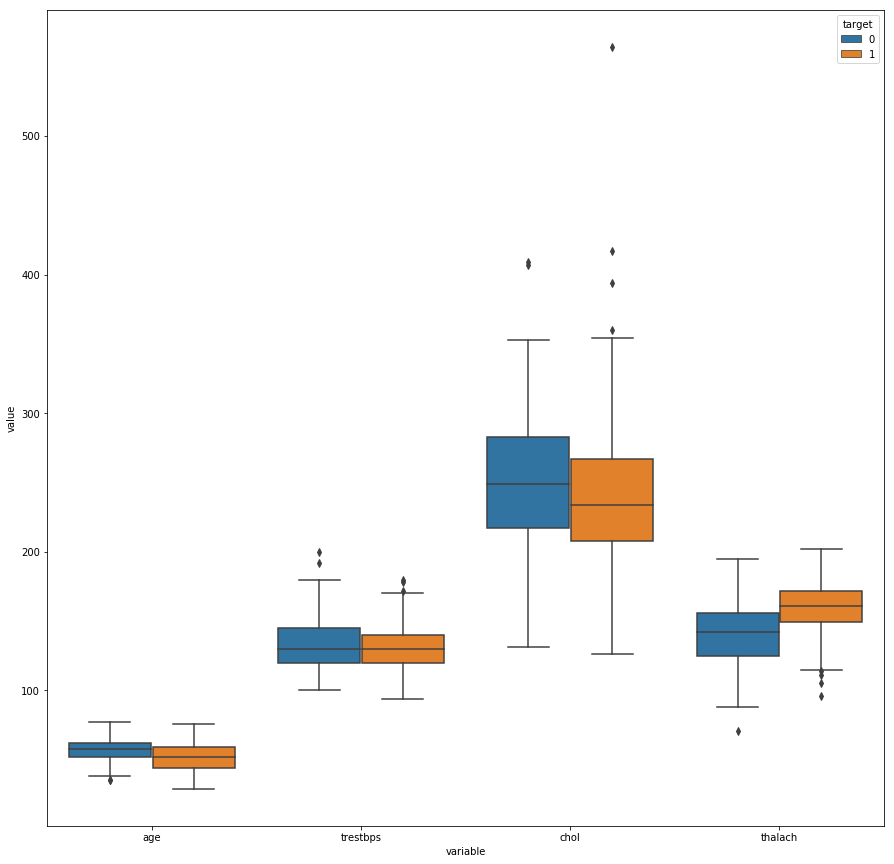

In [55]:
f, ax = plt.subplots(figsize = (15,15))
ax = sns.boxplot(x = "variable", y = "value", hue = "target", data = temp_long)

In [43]:
for var in temp.columns:
    print(var+":")
    print(stats.ttest_ind(temp[temp["target"]==1][var],temp[temp["target"]==0][var]))
    print("-"*80)

age:
Ttest_indResult(statistic=-4.014560975148874, pvalue=7.524801303442373e-05)
--------------------------------------------------------------------------------
trestbps:
Ttest_indResult(statistic=-2.5412927171039, pvalue=0.011546059200233312)
--------------------------------------------------------------------------------
chol:
Ttest_indResult(statistic=-1.4842450762526977, pvalue=0.13879032695600638)
--------------------------------------------------------------------------------
thalach:
Ttest_indResult(statistic=8.069702869452568, pvalue=1.697337638656049e-14)
--------------------------------------------------------------------------------
target:
Ttest_indResult(statistic=inf, pvalue=0.0)
--------------------------------------------------------------------------------


In [51]:
corr_mat = temp.loc[:,["age","trestbps","chol","thalach","target"]].corr()

In [52]:
print(corr_mat)

               age  trestbps      chol   thalach    target
age       1.000000  0.279351  0.213678 -0.398522 -0.225439
trestbps  0.279351  1.000000  0.123174 -0.046698 -0.144931
chol      0.213678  0.123174  1.000000 -0.009940 -0.085239
thalach  -0.398522 -0.046698 -0.009940  1.000000  0.421741
target   -0.225439 -0.144931 -0.085239  0.421741  1.000000


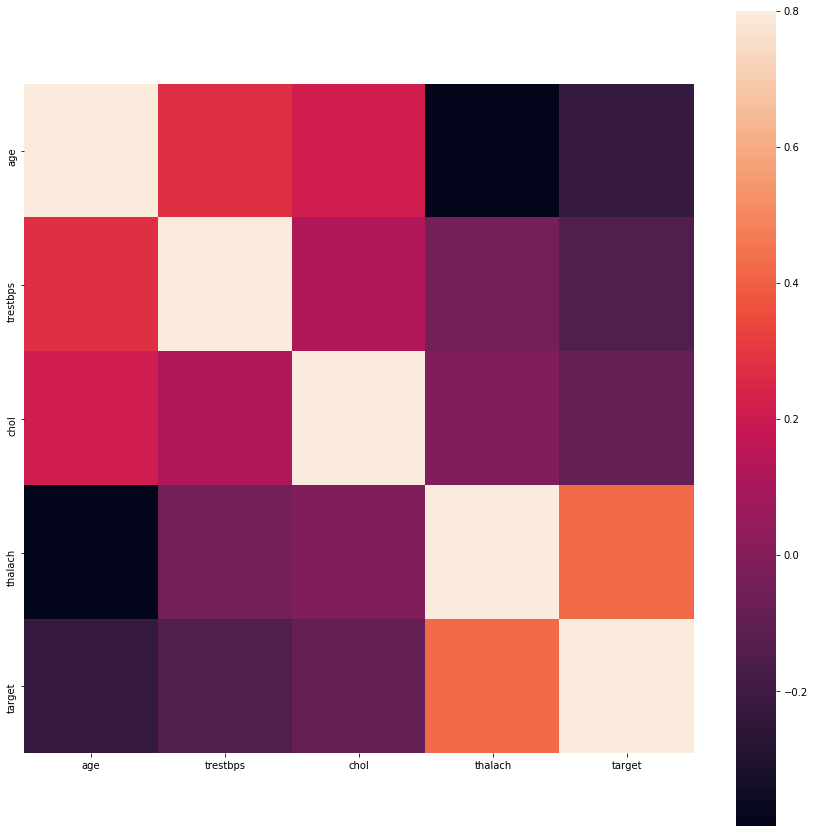

In [54]:
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr_mat,vmax = 0.8, square = True)

In [57]:
temp_discrete = df_prep.loc[:,["sex","cp","fbs","restecg","exang","slope","ca","thal","target"]]

In [62]:
for var in temp_discrete.columns:
    if var != "target":
        cross_tab = pd.crosstab(temp_discrete["target"],temp_discrete[var]).apply(lambda x:round(x/x.sum(),3),axis = 0)
        print(cross_tab)
        print("_"*40)

sex        0      1
target             
0       0.25  0.551
1       0.75  0.449
________________________________________
cp          0     1      2      3
target                           
0       0.727  0.18  0.207  0.304
1       0.273  0.82  0.793  0.696
________________________________________
fbs        0      1
target             
0       0.45  0.489
1       0.55  0.511
________________________________________
restecg      0      1     2
target                     
0        0.537  0.368  0.75
1        0.463  0.632  0.25
________________________________________
exang       0      1
target              
0       0.304  0.768
1       0.696  0.232
________________________________________
slope       0     1      2
target                    
0       0.571  0.65  0.246
1       0.429  0.35  0.754
________________________________________
ca          0      1      2     3    4
target                                
0       0.257  0.677  0.816  0.85  0.2
1       0.743  0.323  0.184  0.15  0.

              sex        cp       fbs   restecg     exang     slope        ca  \
sex      1.000000 -0.049353  0.045032 -0.058196  0.141664 -0.030711  0.118261   
cp      -0.049353  1.000000  0.094444  0.044421 -0.394280  0.119717 -0.181053   
fbs      0.045032  0.094444  1.000000 -0.084189  0.025665 -0.059894  0.137979   
restecg -0.058196  0.044421 -0.084189  1.000000 -0.070733  0.093045 -0.072042   
exang    0.141664 -0.394280  0.025665 -0.070733  1.000000 -0.257748  0.115739   
slope   -0.030711  0.119717 -0.059894  0.093045 -0.257748  1.000000 -0.080155   
ca       0.118261 -0.181053  0.137979 -0.072042  0.115739 -0.080155  1.000000   
thal     0.210041 -0.161736 -0.032019 -0.011981  0.206754 -0.104764  0.151832   
target  -0.280937  0.433798 -0.028046  0.137230 -0.436757  0.345877 -0.391724   

             thal    target  
sex      0.210041 -0.280937  
cp      -0.161736  0.433798  
fbs     -0.032019 -0.028046  
restecg -0.011981  0.137230  
exang    0.206754 -0.436757  
slope   -

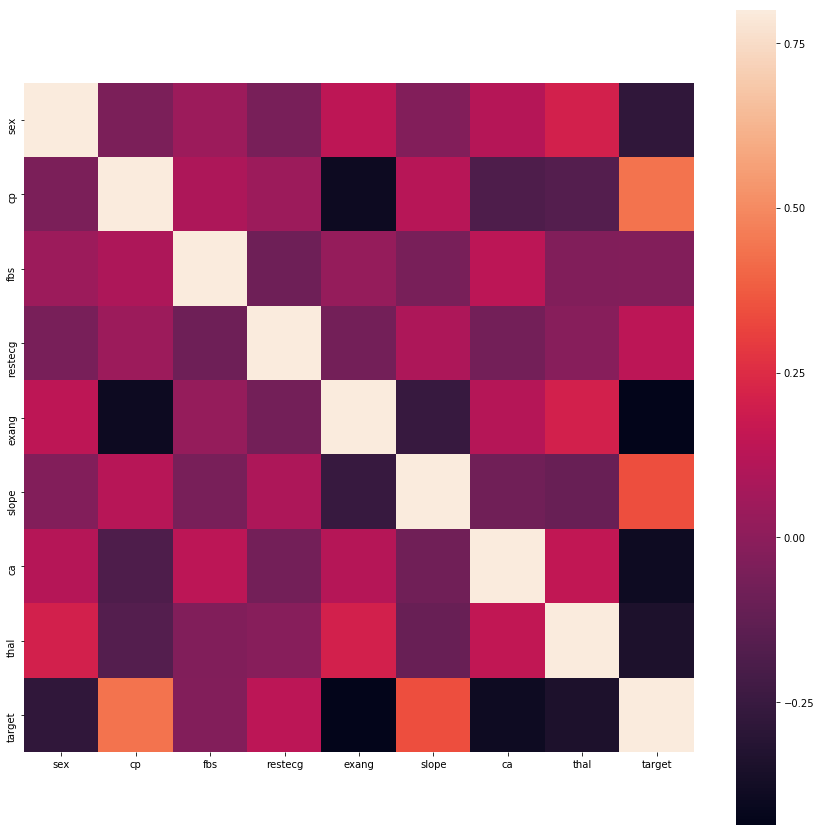

In [66]:
f, ax = plt.subplots(figsize = (15,15))
corr_mat_2 = temp_discrete.corr()
print(corr_mat_2)
sns.heatmap(corr_mat_2,vmax = 0.8,square = True)

In [84]:
model_features = df_prep

In [85]:
for var in temp_discrete.columns:
    for x in range(temp_discrete[var].max()+1):
        model_features[var + "_" + str(x)] = [1 if i == x else 0 for i in temp_discrete[var]]

In [86]:
temp_discrete.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target,sex_0,...,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,target_0,target_1
0,1,3,1,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
1,1,2,0,1,0,0,0,2,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,1,0,0,0,2,0,2,1,1,...,0,0,0,0,0,0,1,0,0,1
3,1,1,0,1,0,2,0,2,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,1,1,2,0,2,1,1,...,0,0,0,0,0,0,1,0,0,1
